In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pyroomacoustics as pra
import noisereduce as nr
from pyroomacoustics.directivities import (
    DirectivityPattern,
    DirectionVector,
    CardioidFamily,
)
from pyroomacoustics.doa import circ_dist
from scipy.io import wavfile
from scipy.signal import correlate
from scipy.fft import fft, fftfreq, fftshift
from playsound import playsound
from os import listdir
from os.path import isfile, join

/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
playsound is relying on a python 2 subprocess. Please use `pip3 install PyObjC` if you want playsound to run more efficiently.


In [250]:
# read in signals from gridpoint
audio_file_path = "/Users/nharrison/DOA_Testing/y=2,x=-1/"
file = "/Users/nharrison/DOA_Testing/Room/1.wav"
fs, noise = wavfile.read(file)
for signalindex in range(1,8+1):
    file = audio_file_path + str(signalindex) + ".wav"
    fs, signal = wavfile.read(file)
    denoised = nr.reduce_noise(y=signal,sr=fs,y_noise=noise)
    if signalindex == 1:
        signals = np.zeros((8, len(signal)))
        denoised_signals = np.zeros((8, len(signal)))

    signals[signalindex-1, :] = signal
    denoised_signals[signalindex-1,:] = denoised
    wavfile.write("/Users/nharrison/denoised"+str(signalindex)+".wav", fs, denoised)



/var/folders/4t/rx6h__y129d95fxhwcb9st6w0000gn/T/ipykernel_9844/3332407641.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, noise = wavfile.read(file)
/var/folders/4t/rx6h__y129d95fxhwcb9st6w0000gn/T/ipykernel_9844/3332407641.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read(file)


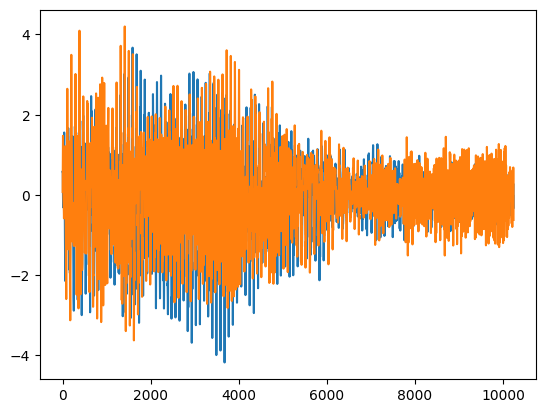

In [251]:
# find start of signal of interest
#plt.plot(signals[1,:])
# signal at 150000
nfft=1024
package = denoised_signals[:,200000:200000+10*nfft]
package = np.array(
    [
        np.divide(channel,np.sqrt(np.var(channel)))
        for channel in package
    ]
)
plt.plot(package[1,:])
plt.plot(package[2,:])


(8, 513, 20)
703.125


AttributeError: 'NoneType' object has no attribute 'shape'

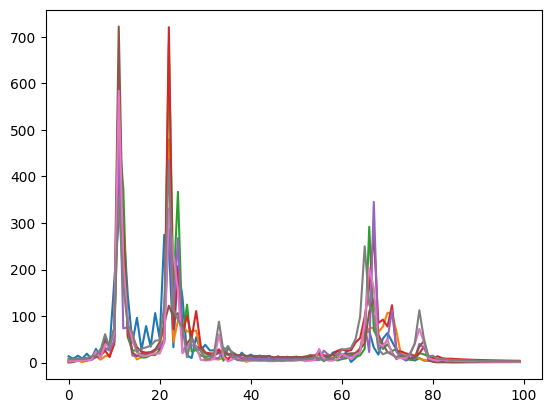

In [252]:
# try normMUSIC with middle two microphones

# make array
array_loc = [0, 0]
sep = -0.3
R = pra.linear_2D_array(center=array_loc, M=6, phi=0, d=sep)

# define frequency range
flow =500
fhigh =1000
num_freq = 20

# make frequency bins
freq_bins = [int(np.round(f / fs * nfft)) for f in [500,600,700]]


# take stft transform of package
X = pra.transform.stft.analysis(package.T, nfft, nfft//2).T
print(X.shape)

plt.plot(np.abs(X[0,:100,0]))
plt.plot(np.abs(X[1,:100,1]))
plt.plot(np.abs(X[2,:100,2]))
plt.plot(np.abs(X[3,:100,3]))
plt.plot(np.abs(X[4,:100,4]))
plt.plot(np.abs(X[5,:100,5]))
plt.plot(np.abs(X[6,:100,6]))
plt.plot(np.abs(X[7,:100,7]))
print(30/nfft*fs/2)


# initialise doa object
music = pra.doa.tops.TOPS(R, fs, nfft,num_src=1,azimuth = np.linspace(0, 180, 181)*np.pi/180,mode='far',frequency_normalization=False)
music.locate_sources(X[1:7,:,:],freq_bins = freq_bins)



print(music.Pssl.shape)


[89.]


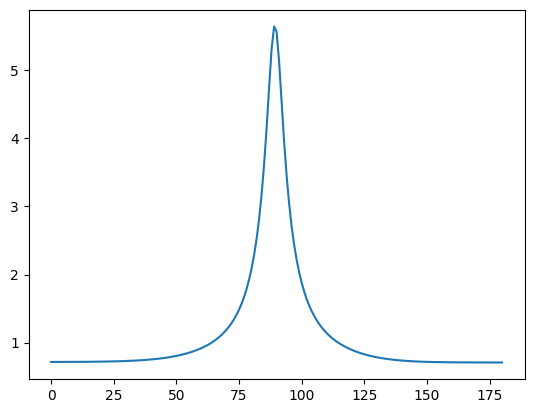

In [249]:
print(music.azimuth_recon*180/np.pi)
plt.plot(music.grid.azimuth*180/np.pi,music.grid.values)
cardioid = 0.5+0.5*np.cos(music.grid.azimuth-np.pi/2)
#plt.plot(music.grid.values/cardioid)

100
100
100


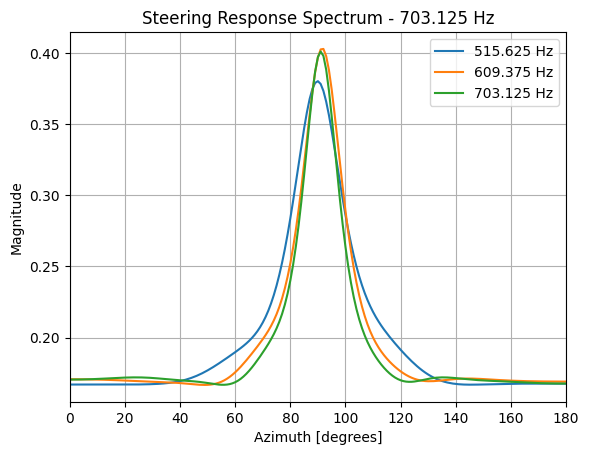

In [242]:
peaks = np.zeros(music.num_freq)
for k in range(music.num_freq):
    freq = float(music.freq_bins[k]) / music.nfft * fs
    azimuth = music.grid.azimuth * 180 / np.pi

    plt.plot(azimuth, music.Pssl[:,k],label=str(freq) + " Hz")
    print(np.argmax(music.Pssl[100:140,k])+100)
    peaks[k] = np.argmax(music.Pssl[100:140,k])+100
    plt.ylabel("Magnitude")
    plt.xlabel("Azimuth [degrees]")
    plt.xlim(min(azimuth), max(azimuth))
    plt.title("Steering Response Spectrum - " + str(freq) + " Hz")
    plt.grid(True)
    plt.legend()
    plt.show

freqs = [float(music.freq_bins[k]) / music.nfft * fs for k in range(music.num_freq)]
#plt.plot(freqs,peaks-117*np.ones(music.num_freq))
#plt.plot(freqs,peaks)

(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[92.]
(6, 10240)
(6, 513, 20)
[92.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[90.]
(6, 10240)
(6, 513, 20)
[91.]
(6, 10240)
(6, 513, 20)
[91.]
(6, 10240)
(6, 513, 20)
[97.]
(6, 10240)
(6, 513, 20)
[97.]
(6, 10240)
(6, 513, 20)
[93.]
(6, 10240)
(6, 513, 20)
[111.]
(6, 10240)
(6, 513, 20)
[113.]
(6, 10240)
(6, 513, 20)
[112.]
(6, 10240)
(6, 513, 20)
[116.]
(6, 10240)
(6, 513, 20)
[140.]
(6, 10240)
(6, 513, 20)
[140.]
(6, 10240)
(6, 513, 20)
[140.]
(6, 10240)
(6, 513, 20)
[140.]
(6, 10240)
(6, 513, 20)
[140.]
(6, 10240)
(6, 513, 20)
[147.]
(6, 10240)
(6, 513, 20)
[144.]
(6, 10240)
(6, 513, 20)
[180.]
(6, 10240)
(6, 513, 20)
[165.]
(6, 10240)
(6, 513, 20)
[165.]
(6, 10240)
(6, 513, 20)
[173.]
(6, 10240)
(6, 513, 20)
[40.]
(6, 10240)
(6, 513, 20)
[128.]
(6, 10240)
(6, 513, 20)
[123.]
(6, 10240)
(6, 513, 20)

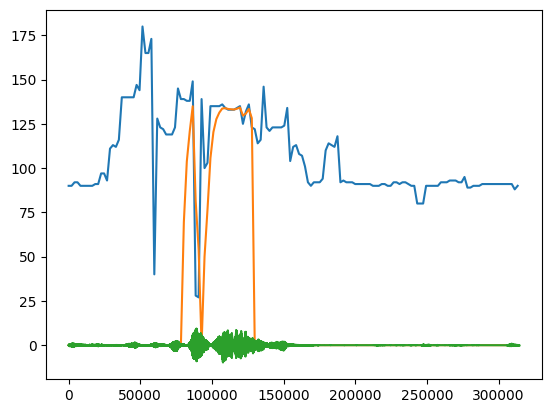

In [243]:
# now try a moving package


step = 2*nfft
nsamples = signals.shape[1]
numpackages = nsamples//step
azs = np.zeros(numpackages)
volumes = np.zeros(numpackages)
weightedazs = np.zeros(numpackages)
threshold = 1
currentaz = 0
signals = np.array(
    [
        np.divide(signal,np.sqrt(np.var(signal)))
        for signal in denoised_signals
    ]
)

for i in range(numpackages):
    package = signals[1:7,i*step:10*nfft+i*step]
    print(package.shape)
    # normalise package
    volume = np.var(package[3,:])
    volumes[i]=volume
    X = pra.transform.stft.analysis(package.T, nfft, nfft//2).T
    print(X.shape)
    #plt.plot(abs(X))
    music.locate_sources(X,freq_bins = freq_bins)
    print(music.azimuth_recon*180/np.pi)
    azs[i] = music.azimuth_recon*180/np.pi
    if i%30 == 0:
        pass
        #plt.plot(music.grid.azimuth*180/np.pi,music.grid.values)
    
    if volume < threshold:
        weightedazs[i] = 0
    elif currentaz == 0:
        currentaz = music.azimuth_recon*180/np.pi
        weightedazs[i]
    else:
        weightedazs[i] = (weightedazs[i-1]+music.azimuth_recon*180/np.pi)/2


    

plt.plot(np.linspace(0, numpackages*step, numpackages),azs)
plt.plot(np.linspace(0, numpackages*step, numpackages),weightedazs)
plt.plot(signals[1,:])